In [81]:
import numpy as np
import numpy.random as rand
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from utils import generate_convex_polygon, center_polygon

[[0.85447622 0.38760839]
 [0.99922304 0.49731326]
 [0.92319582 0.88956375]
 [0.16746654 0.63286952]
 [0.0798196  0.37105931]
 [0.09663301 0.31970767]]
[[0.76194372 0.26964905]
 [0.83366541 0.3942612 ]
 [0.7063562  0.95808283]
 [0.26891472 0.74960402]
 [0.26441609 0.40085234]
 [0.28551808 0.32567246]]


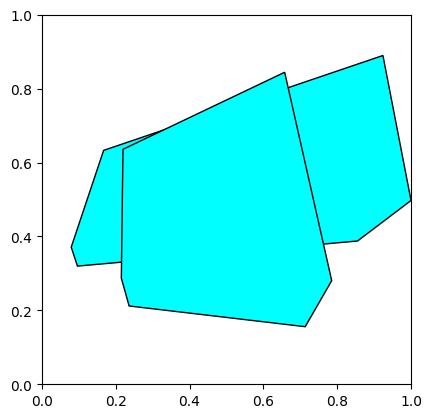

In [141]:
points = generate_convex_polygon(n=6)

pca = PCA(n_components=2)
points_centered = points - np.mean(points, axis=0)
pca.fit(points_centered)

transformed_points = pca.transform(points_centered)
variance = np.var(transformed_points, axis=0)  # Variance along each principal component
scaling_factors = 0.25 / np.sqrt(variance)  # Scale to unit variance
transformed_points_scaled = transformed_points * scaling_factors

rescaled_points = pca.inverse_transform(transformed_points_scaled) + np.mean(points, axis=0)

print(points)
print(rescaled_points)

new_points = center_polygon(rescaled_points)

fig, ax = plt.subplots()
polygon1 = patches.Polygon(points, closed=True, edgecolor='black', facecolor='cyan')
polygon2 = patches.Polygon(new_points, closed=True, edgecolor='black', facecolor='cyan')
ax.add_patch(polygon1)
ax.add_patch(polygon2)
ax.set_aspect('equal', 'box')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()

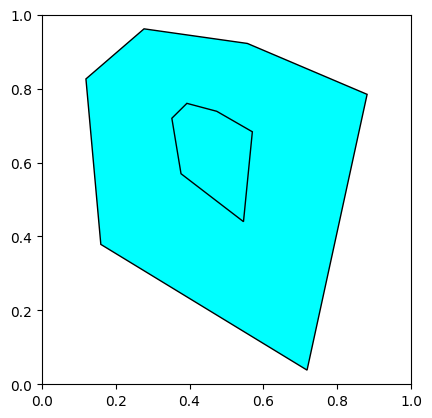